In [1]:
import sys

In [2]:
sys.path

['',
 '/usr/local/anaconda2/lib/python27.zip',
 '/usr/local/anaconda2/lib/python2.7',
 '/usr/local/anaconda2/lib/python2.7/plat-linux2',
 '/usr/local/anaconda2/lib/python2.7/lib-tk',
 '/usr/local/anaconda2/lib/python2.7/lib-old',
 '/usr/local/anaconda2/lib/python2.7/lib-dynload',
 '/usr/local/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages',
 '/usr/local/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/claudius/.ipython']

In [3]:
import os

In [4]:
os.getcwd()

'/data3/claudius/Big_Data/DADI/dadiExercises'

I have cloned the $\delta$a$\delta$i repository into '/home/claudius/Downloads/dadi' and have compiled the code. Now I need to add that directory to the PYTHONPATH variable:

In [5]:
sys.path.insert(0, '/home/claudius/Downloads/dadi')

In [6]:
sys.path

['/home/claudius/Downloads/dadi',
 '',
 '/usr/local/anaconda2/lib/python27.zip',
 '/usr/local/anaconda2/lib/python2.7',
 '/usr/local/anaconda2/lib/python2.7/plat-linux2',
 '/usr/local/anaconda2/lib/python2.7/lib-tk',
 '/usr/local/anaconda2/lib/python2.7/lib-old',
 '/usr/local/anaconda2/lib/python2.7/lib-dynload',
 '/usr/local/anaconda2/lib/python2.7/site-packages/Sphinx-1.3.5-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages/setuptools-20.3-py2.7.egg',
 '/usr/local/anaconda2/lib/python2.7/site-packages',
 '/usr/local/anaconda2/lib/python2.7/site-packages/IPython/extensions',
 '/home/claudius/.ipython']

Now, I should be able to import $\delta$a$\delta$i

In [7]:
import dadi

In [8]:
dir(dadi)

['Demographics1D',
 'Demographics2D',
 'Godambe',
 'Inference',
 'Integration',
 'Misc',
 'Numerics',
 'PhiManip',
 'Plotting',
 'Spectrum',
 'Spectrum_mod',
 'Triallele',
 '__builtins__',
 '__doc__',
 '__file__',
 '__name__',
 '__package__',
 '__path__',
 'integration_c',
 'logging',
 'numpy',
 'tridiag']

In [9]:
import pylab

In [10]:
%matplotlib inline

In [11]:
x = pylab.linspace(0, 4*pylab.pi, 1000)

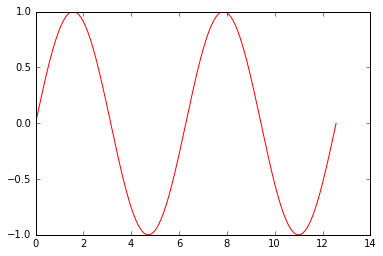

In [12]:
pylab.plot(x, pylab.sin(x), '-r')

In [13]:
%%sh 
# this allows me to execute a shell command

ls

ERY.FOLDED.sfs
ERY.FOLDED.sfs.dadi_format
ERY.FOLDED.sfs.dadi_format~
EryPar.unfolded.2dsfs
EryPar.unfolded.2dsfs.dadi_format
EryPar.unfolded.2dsfs.dadi_format~
examples
example_YRI_CEU.ipynb
First_Steps_with_dadi.ipynb
new.bib
PAR.FOLDED.sfs
PAR.FOLDED.sfs.dadi_format
PAR.FOLDED.sfs.dadi_format~


I have turned the 1D folded SFS's from `realSFS` into $\delta$d$\delta$i format by hand according to the description in section 3.1 of the manual. I have left out the masking line from the input file.

In [14]:
fs_ery = dadi.Spectrum.from_file('ERY.FOLDED.sfs.dadi_format')

In [15]:
fs_ery

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 --], folded=True, pop_ids=None)

$\delta$a$\delta$i is detecting that the spectrum is folded (as given in the input file), but it is also automatically masking the 0th and 18th count category. This is a not a good behaviour.

In [16]:
# number of segregating sites

fs_ery.data[1:].sum()

43649.777914000006

## Single population statistics

### $\pi$

In [17]:
fs_ery.pi()

13545.692898679737

I have next added a masking line to the input file, setting it to '1' for the first position, i. e. the 0-count category.

In [18]:
fs_ery = dadi.Spectrum.from_file('ERY.FOLDED.sfs.dadi_format', mask_corners=False)

$\delta$a$\delta$i is issuing the following message when executing the above command:

`WARNING:Spectrum_mod:Creating Spectrum with data_folded = True, but mask is not True for all entries which are nonsensical for a folded Spectrum.`

In [19]:
fs_ery

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924], folded=True, pop_ids=None)

I do not understand this warning from $\delta$a$\delta$i. The 18-count category is sensical for a folded spectrum with even sample size, so should not be masked. Anyway, I do not understand why $\delta$a$\delta$i is so reluctant to keep all positions, including the non-variable one.

In [20]:
fs_ery.pi()

13545.692898679737

The function that returns $\pi$ produces the same output with or without the last count category masked ?! I think that is because even if the last count class (966.62...) is masked, it is still included in the calculation of $\pi$. However, there is no obvious unmasking in the `pi` function. Strange!

There are (at least) two formulas that allow the calculation of $\pi$ from a folded sample allele frequency spectrum. One is given in Wakeley2009, p.16, equation (1.4):
$$
\pi = \frac{1}{n \choose 2} \sum_{i=1}^{n/2} i(n-i)\eta_{i}
$$
Here, $n$ is the number of sequences and $\eta_{i}$ is the SNP count in the i'th minor sample allele frequency class.

The other formula is on p. 45 in Gillespie "Population Genetics - A concise guide":
$$
\hat{\pi} = \frac{n}{n-1} \sum_{i=1}^{S_{n}} 2 \hat{p_{i}}(1-\hat{p_{i}})
$$
This is the formula that $\delta$a$\delta$i's `pi` function uses, with the modification that it multiplies each $\hat{p_{i}}$ by the count in the i'th class of the SFS, i. e. the sum is not over all SNP's but over all SNP frequency classes.

In [21]:
# Calcualting pi with the formula from Wakeley2009

n = 36 # 36 sequences sampled from 18 diploid individuals
pi_Wakeley = (sum( [i*(n-i)*fs_ery[i] for i in range(1, n/2+1)] ) * 2.0 / (n*(n-1)))/pylab.sum(fs_ery.data)
# note fs_ery.data gets the whole fs_ery list, including masked entries
pi_Wakeley

0.0065187712427359126

This is the value of $\pi_{site}$ that I calculated previously and included in the first draft of the thesis.

In [22]:
fs_ery.mask

array([ True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False, False], dtype=bool)

In [23]:
fs_ery.data # gets all data, including the masked one

array([  1.59481822e+06,   7.83303869e+03,   7.41469984e+03,
         4.10927941e+03,   3.61471726e+03,   3.09597332e+03,
         2.03146089e+03,   1.58465693e+03,   2.58365232e+03,
         1.14207525e+03,   1.05234602e+03,   1.76577342e+03,
         1.25513880e+03,   1.07251653e+03,   1.41791613e+03,
         3.95750470e+02,   1.94708764e+03,   3.67072082e+02,
         9.66622924e+02])

In [24]:
# Calculating pi with the formula from Gillespie:

n = 18 
p = pylab.arange(0, n+1)/float(n)
p

array([ 0.        ,  0.05555556,  0.11111111,  0.16666667,  0.22222222,
        0.27777778,  0.33333333,  0.38888889,  0.44444444,  0.5       ,
        0.55555556,  0.61111111,  0.66666667,  0.72222222,  0.77777778,
        0.83333333,  0.88888889,  0.94444444,  1.        ])

In [25]:
# Calculating pi with the formula from Gillespie:

n / (n-1.0) * 2 * pylab.sum(fs_ery * p*(1-p))

13545.692898679737

This is the same as the output of dadi's `pi` function on the same SFS. 

In [26]:
# the sample size (n) that dadi stores in this spectrum object and uses as n in the pi function
fs_ery.sample_sizes[0]

18

In [27]:
# what is the total number of sites in the spectrum
pylab.sum(fs_ery.data)

1638467.9999990002

So, 1.6 million sites went into the ery spectrum.

In [28]:
# pi per site
n / (n-1.0) * 2 * pylab.sum(fs_ery * p*(1-p)) / pylab.sum(fs_ery.data)

0.0082672917009596787

Apart from the incorrect small sample size correction by $\delta$a$\delta$i in case of folded spectra ($n$ refers to sampled sequences, not individuals), Gillespie's formula leads to a much higher estimate of $\pi_{site}$ than Wakeley's. Why is that?

In [29]:
# with correct small sample size correction
2 * n / (2* n-1.0) * 2 * pylab.sum(fs_ery * p*(1-p)) / pylab.sum(fs_ery.data)

0.0080310833666465443

In [30]:
# Calculating pi with the formula from Gillespie:

n = 18 
p = pylab.arange(0, n+1)/float(n)
p = p/2 # with a folded spectrum, we are summing over minor allele freqs only
pi_Gillespie = 2*n / (2*n-1.0) * 2 * pylab.sum(fs_ery * p*(1-p)) / pylab.sum(fs_ery.data)
pi_Gillespie

0.0065187712427359117

In [31]:
pi_Wakeley - pi_Gillespie

8.6736173798840355e-19

As can be seen from the insignificant difference (must be due to numerical inaccuracies) between the $\pi_{Wakeley}$ and the $\pi_{Gillespie}$ estimates, they are equivalent with the calculation for folded spectra given above as well as the correct small sample size correction. **Beware: $\delta$a$\delta$i does not handle folded spectra correctly**.

It should be a relatively easy to fix the `pi` function to work correctly with folded spectra. Care should be taken to also correctly handle uneven sample sizes.

In [32]:
fs_ery.folded

True

I think for now it would be best to import unfolded spectra from `realSFS` and fold them if necessary in dadi.

In [33]:
fs_par = dadi.Spectrum.from_file('PAR.FOLDED.sfs.dadi_format')

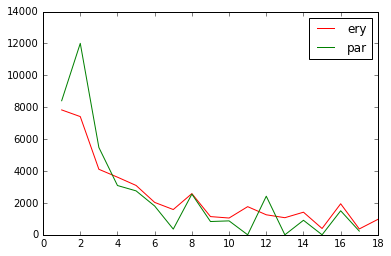

In [34]:
pylab.plot(fs_ery, 'r', label='ery')
pylab.plot(fs_par, 'g', label='par')
pylab.legend()

---

### ML estimate of $\theta$ from 1D folded spectrum

I am trying to fit eq. 4.21 of Wakeley2009 to the oberseved 1D folded spectra.

$$
E[\eta_i] = \theta \frac{\frac{1}{i} + \frac{1}{n-i}}{1+\delta_{i,n-i}} \qquad 1 \le i \le \big[n/2\big]
$$

Each frequency class, $\eta_i$, provides an estimate of $\theta$. However, I would like to find the value of $\theta$ that minimizes the deviation of the above equation from all observed counts $\eta_i$.

I am following the example given here: https://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html#example-of-solving-a-fitting-problem

$$
\frac{\delta E}{\delta \theta} = \frac{\frac{1}{i} + \frac{1}{n-i}}{1+\delta_{i,n-i}} \qquad 1 \le i \le \big[n/2\big]
$$

I have just one parameter to optimize.

In [35]:
from scipy.optimize import least_squares

In [36]:
def model(theta, eta, n):
    """
    theta: scaled population mutation rate parameter [scalar]
    eta: the folded 1D spectrum, including 0-count cat. [list] 
    n: number of sampled gene copies, i. e. 2*num_ind [scalar]
    
    returns a numpy array
    """
    i = pylab.arange(1, eta.size)
    delta = pylab.where(i == n-i, 1, 0)
    return theta * 1/i + 1/(n-i) / (1 + delta)

In [37]:
?pylab.where

In [38]:
# test
i = pylab.arange(1, 19)
n = 36
print i == n-i
#
print pylab.where(i == n-i, 1, 0)
# get a theta estimate from pi:
theta = pi_Wakeley * fs_ery.data.sum() 
print theta
#
print len(fs_ery)
#
model(theta, fs_ery, 36)

[False False False False False False False False False False False False
 False False False False False  True]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
10680.7980805
19


array([ 10680.79808054,   5340.39904027,   3560.26602685,   2670.19952013,
         2136.15961611,   1780.13301342,   1525.82829722,   1335.09976007,
         1186.75534228,   1068.07980805,    970.98164369,    890.06650671,
          821.59985235,    762.91414861,    712.05320537,    667.54988003,
          628.28224003,    593.37767114])

In [39]:
def fun(theta, eta, n):
    """
    return residuals between model and data
    """
    return model(theta, eta, n) - eta[1:]

In [40]:
def jac(theta, eta, n, test=False):
    """
    creates a Jacobian matrix
    """
    J = pylab.empty((eta.size-1, theta.size))
    i = pylab.arange(1, eta.size, dtype=float)
    delta = pylab.where(i == n-i, 1, 0)
    num = 1/i + 1/(n-i)
    den = 1 + delta
    if test:
        print i
        print num
        print den
    J[:,0] = num / den
    return J

In [41]:
# test
jac(theta, fs_ery, 36, test=True)

[  1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.  14.  15.
  16.  17.  18.]
[ 1.02857143  0.52941176  0.36363636  0.28125     0.23225806  0.2
  0.1773399   0.16071429  0.14814815  0.13846154  0.13090909  0.125
  0.12040134  0.11688312  0.11428571  0.1125      0.11145511  0.11111111]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]


array([[ 1.02857143],
       [ 0.52941176],
       [ 0.36363636],
       [ 0.28125   ],
       [ 0.23225806],
       [ 0.2       ],
       [ 0.1773399 ],
       [ 0.16071429],
       [ 0.14814815],
       [ 0.13846154],
       [ 0.13090909],
       [ 0.125     ],
       [ 0.12040134],
       [ 0.11688312],
       [ 0.11428571],
       [ 0.1125    ],
       [ 0.11145511],
       [ 0.05555556]])

In [42]:
# starting value
theta0 = theta # pi_Wakeley from above

In [43]:
# sum over unmasked entries, i. e. without 0-count category, i. e. returns number of variable sites
fs_ery.sum()

43649.777914000006

In [44]:
# optimize
res = least_squares(fun, x0=theta0, jac=jac, bounds=(0,fs_ery.sum()), 
                    kwargs={'eta': fs_ery, 'n': 36}, verbose=1)

Both `ftol` and `xtol` termination conditions are satisfied.
Function evaluations: 8, initial cost: 9.6784e+06, final cost 9.5162e+06, first-order optimality 1.08e-01.


In [45]:
res.success

True

In [46]:
?least_squares

In [47]:
print res.x
print theta

[ 10367.32782801]
10680.7980805


In [48]:
pylab.rcParams['figure.figsize'] = [12.0, 8.0]

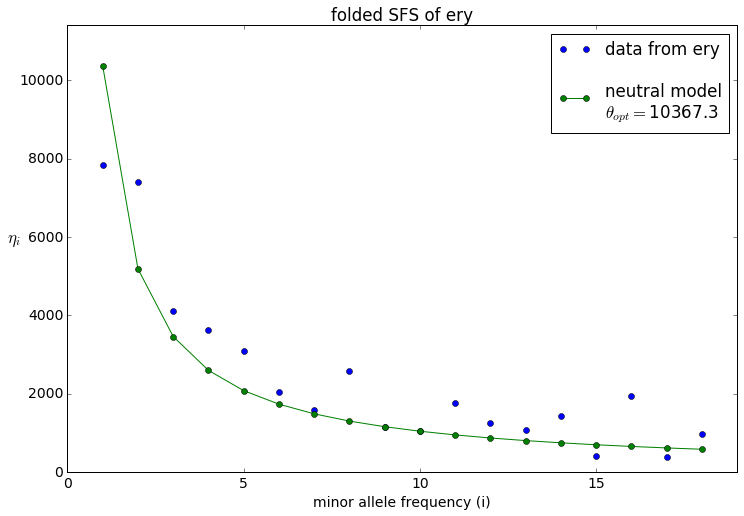

In [49]:
import matplotlib.pyplot as plt

plt.rcParams['font.size'] = 14.0

i = range(1, len(fs_ery))
eta_model = model(res.x, eta=fs_ery, n=36) # get predicted values with optimal theta

plt.plot(i, fs_ery[1:], "bo", label="data from ery") # plot observed spectrum

ymax = max( fs_ery[1:].max(), eta_model.max() )
plt.axis([0, 19, 0, ymax*1.1]) # set axis range

plt.xlabel("minor allele frequency (i)")
plt.ylabel(r'$\eta_i$', fontsize='large', rotation='horizontal')
plt.title("folded SFS of ery")

plt.plot(i, eta_model, "go-", 
         label="\nneutral model" 
         + "\n"
         + r'$\theta_{opt} = $' + str(round(res.x, 1))
        ) # plot model prediction with optimal theta

plt.legend()

The counts in each frequency class should be Poisson distributed with rate equal to $E[\eta_i]$ as given above. The lowest frequency class has the highest rate and therefore also the highest variance

In [50]:
#?plt.ylabel

In [51]:
#print plt.rcParams

In [52]:
fs_ery[1:].max()

7833.0386900000003

In [53]:
#?pylab

In [54]:
os.getcwd()

'/data3/claudius/Big_Data/DADI/dadiExercises'

In [55]:
%%sh

ls

ERY.FOLDED.sfs
ERY.FOLDED.sfs.dadi_format
ERY.FOLDED.sfs.dadi_format~
EryPar.unfolded.2dsfs
EryPar.unfolded.2dsfs.dadi_format
EryPar.unfolded.2dsfs.dadi_format~
examples
example_YRI_CEU.ipynb
First_Steps_with_dadi.ipynb
new.bib
PAR.FOLDED.sfs
PAR.FOLDED.sfs.dadi_format
PAR.FOLDED.sfs.dadi_format~


The following function will take the file name of a file containing the flat 1D folded frequency spectrum of one population and plots it together with the best fitting neutral expectation.

In [56]:
def plot_folded_sfs(filename, n, pop = ''):
    # read in spectrum from file
    data = open(filename, 'r')
    sfs = pylab.array( data.readline().split(), dtype=float )
    data.close() # should close connection to file
    #return sfs
    
    # get starting value for theta from Watterson's theta
    S = sfs[1:].sum()
    T_total = sum([1.0/i for i in range(1, n)]) # onhe half the expected total length of the genealogy
    theta0 = S / T_total # see eq. 4.7 in Wakeley2009
    
    # optimize
    res = least_squares(fun, x0=theta0, jac=jac, bounds=(0, sfs.sum()), 
                   kwargs={'eta': sfs, 'n': 36}, verbose=1)
    #print "Optimal theta per site is {0:.4f}".format(res.x[0]/sfs.sum())
    #print res.x[0]/sfs.sum()
    
    #return theta0, res
    
    # plot
    plt.rcParams['font.size'] = 14.0

    i = range(1, len(sfs))
    eta_model = model(res.x, eta=sfs, n=36) # get predicted values with optimal theta

    plt.plot(i, sfs[1:], "rs", label="data of " + pop) # plot observed spectrum

    ymax = max( sfs[1:].max(), eta_model.max() )
    plt.axis([0, 19, 0, ymax*1.1]) # set axis range

    plt.xlabel("minor allele frequency (i)")
    plt.ylabel(r'$\eta_i$', fontsize='large', rotation='horizontal')
    plt.title("folded SFS")
    plt.text(5, 10000, 
             r"Optimal neutral $\theta$ per site is {0:.4f}".format(res.x[0]/sfs.sum()))

    plt.plot(i, eta_model, "go-", 
         label="\nneutral model" 
         + "\n"
         + r'$\theta_{opt} = $' + str(round(res.x, 1))
        ) # plot model prediction with optimal theta

    plt.legend()

`xtol` termination condition is satisfied.
Function evaluations: 12, initial cost: 3.1360e+07, final cost 3.0064e+07, first-order optimality 1.56e+07.


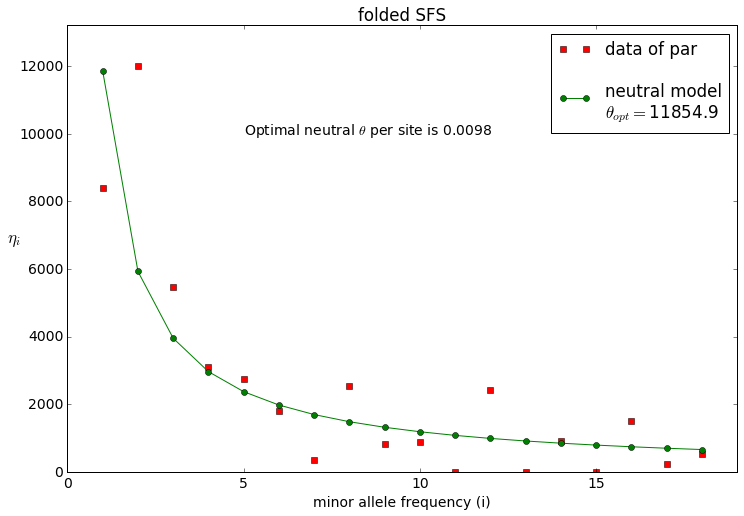

In [57]:
plot_folded_sfs('PAR.FOLDED.sfs', n=36, pop='par')

`ftol` termination condition is satisfied.
Function evaluations: 7, initial cost: 9.5789e+06, final cost 9.5162e+06, first-order optimality 6.25e-01.


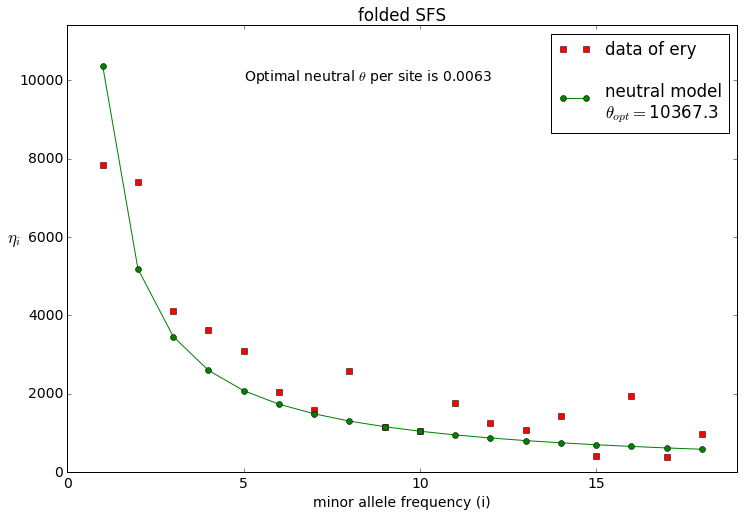

In [58]:
plot_folded_sfs('ERY.FOLDED.sfs', n=36, pop='ery')

### Univariate function minimizers or 1D scalar minimisation

Since I only have one value to optimize, I can use a slightly simpler approach than used above:

In [59]:
from scipy.optimize import minimize_scalar

In [60]:
?minimize_scalar

In [61]:
# define cost function
def f(theta, eta, n):
    """
    return sum of squared deviations between model and data
    """
    return sum( (model(theta, eta, n) - eta[1:])**2 ) # see above for definition of the 'model' function

It would be interesting to know whether the cost function is convex or not.

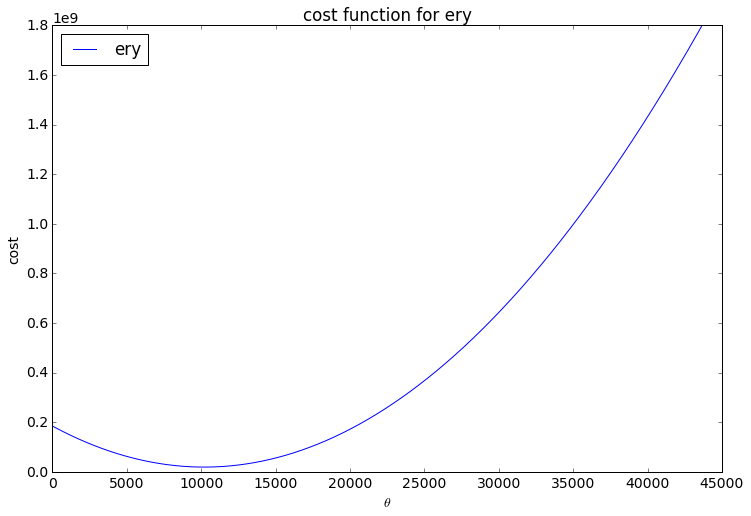

In [62]:
theta = pylab.arange(0, fs_ery.data[1:].sum()) # specify range of theta
cost = [f(t, fs_ery.data, 36) for t in theta]
plt.plot(theta, cost, 'b-', label='ery')
plt.xlabel(r'$\theta$')
plt.ylabel('cost')
plt.title("cost function for ery")
plt.legend(loc='best')

In [63]:
?plt.legend

Within the specified bounds (the observed $\theta$, i. e. derived from the data, cannot lie outside these bounds), the cost function is convex. This is therefore an easy optimisation problem. See [here](http://www.scipy-lectures.org/advanced/mathematical_optimization/index.html) for more details.

In [64]:
res = minimize_scalar(f, bounds = (0, fs_ery.data[1:].sum()), method = 'bounded', args = (fs_ery.data, 36))

In [65]:
res

     fun: 18987280.758395974
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 10198.886010965949

In [66]:
# number of segregating sites

fs_par.data[1:].sum()

43755.705189

In [67]:
res = minimize_scalar(f, bounds = (0, fs_par.data[1:].sum()), method = 'bounded', args = (fs_par.data, 36))

In [68]:
res

     fun: 60127046.281448714
 message: 'Solution found.'
    nfev: 6
  status: 0
 success: True
       x: 11828.17091399114

The fitted values of $\theta$ are similar to the ones obtained above with the `least_squares` function. The estimates for ery deviate more than for par.

In [69]:
from sympy import *

In [70]:
x0 , x1 = symbols('x0 x1')

In [71]:
init_printing(use_unicode=True)

In [72]:
diff(0.5*(1-x0)**2 + (x1-x0**2)**2, x0)

In [73]:
diff(0.5*(1-x0)**2 + (x1-x0**2)**2, x1)

Wow! Sympy is a replacement for Mathematica. There is also Sage, which may include even more functionality.

In [74]:
from scipy.optimize import curve_fit

`Curve_fit` is another function that can be used for optimization.

In [75]:
?curve_fit

In [76]:
def model(i, theta):
    """
    i: indpendent variable, here minor SNP frequency classes
    theta: scaled population mutation rate parameter [scalar]
    
    returns a numpy array
    """
    n = len(i)
    delta = pylab.where(i == n-i, 1, 0)
    return theta * 1/i + 1/(n-i) / (1 + delta)

In [77]:
i = pylab.arange(1, fs_ery.size)

popt, pcov = curve_fit(model, i, fs_ery.data[1:])

In [78]:
# optimal theta
print popt

[ 10198.84901849]


In [79]:
perr = pylab.sqrt(pcov)
perr

array([[ 837.89916279]])

In [80]:
print str(int(popt[0] - 1.96*perr[0])) + ' < ' + str(int(popt[0])) + ' < ' + str(int(popt[0] + 1.96*perr[0]))

8556 < 10198 < 11841


In [81]:
popt, pcov = curve_fit(model, i, fs_par.data[1:])
perr = pylab.sqrt(pcov)
print str(int(popt[0] - 1.96*perr[0])) + ' < ' + str(int(popt[0])) + ' < ' + str(int(popt[0] + 1.96*perr[0]))

8905 < 11828 < 14750


I am not sure whether these standard errors (perr) are correct. It may be that it is assumed that errors are normally distributed, which they are not exactly in this case. They should be close to Poisson distributed (see Fu1995), which should be fairly similar to normal with such high expected values as here.

If the standard errors are correct, then the large overlap of the 95% confidence intervals would indicate that the data do not provide significant support for a difference in $\theta$ between par and ery.

## Parametric bootstrap from the observed SFS

In [82]:
%pwd

u'/data3/claudius/Big_Data/DADI/dadiExercises'

In [83]:
% ll

total 660
lrwxrwxrwx 1 claudius     53 Feb 17 15:37 ERY.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/ERY/ERY.FOLDED.sfs
-rw-rw-r-- 1 claudius    462 Mar 15 12:48 ERY.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius    462 Mar 15 12:45 ERY.FOLDED.sfs.dadi_format~
lrwxrwxrwx 1 claudius     37 Feb 18 17:46 EryPar.unfolded.2dsfs -> ../../ANGSD/FST/EryPar.unfolded.2dsfs
-rw-rw-r-- 1 claudius  13051 Feb 18 19:00 EryPar.unfolded.2dsfs.dadi_format
-rw-rw-r-- 1 claudius  13051 Feb 18 18:31 EryPar.unfolded.2dsfs.dadi_format~
drwxrwxr-x 5 claudius   4096 Feb 17 13:45 examples/
-rw-rw-r-- 1 claudius  18014 Mar 15 21:39 example_YRI_CEU.ipynb
-rw-rw-r-- 1 claudius 596246 Mar 17 15:45 First_Steps_with_dadi.ipynb
-rw-rw-r-- 1 claudius   1012 Mar 16 09:54 new.bib
lrwxrwxrwx 1 claudius     53 Feb 17 15:37 PAR.FOLDED.sfs -> /data3/claudius/Big_Data/ANGSD/SFS/PAR/PAR.FOLDED.sfs
-rw-rw-r-- 1 claudius    412 Feb 17 16:29 PAR.FOLDED.sfs.dadi_format
-rw-rw-r-- 1 claudius    218 Feb 17 15:51 PAR.FOLDED.sfs.dad

In [84]:
! cat ERY.FOLDED.sfs.dadi_format

# this is the ML estimate of the folded sample frequency spectrum for erythropus, estimated with realSFS of ANGSD
# this is the spectrum in dadi format (see section 3.1 of the manual)
19 folded
1594818.222085 7833.038690 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799 1072.516527 1417.916128 395.750470 1947.087637 367.072082 966.622924 
1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 


In [85]:
fs_ery = dadi.Spectrum.from_file('ERY.FOLDED.sfs.dadi_format', mask_corners=False)

In [86]:
fs_ery

Spectrum([-- 7833.03869 7414.699839 4109.279415 3614.717256 3095.973324 2031.460887
 1584.656928 2583.652317 1142.075255 1052.346021 1765.773415 1255.138799
 1072.516527 1417.916128 395.75047 1947.087637 367.072082 966.622924], folded=True, pop_ids=None)

In [87]:
fs_ery.pop_ids = ['ery']

In [88]:
# get a Poisson sample from the observed spectrum

fs_ery_param_boot = fs_ery.sample()

In [89]:
fs_ery_param_boot

Spectrum([-- 7727.0 7286.0 4114.0 3578.0 3064.0 2051.0 1574.0 2532.0 1177.0 1083.0
 1722.0 1219.0 1025.0 1382.0 403.0 1910.0 377.0 --], folded=True, pop_ids=['ery'])

In [90]:
fs_ery_param_boot.data

array([    0.,  7727.,  7286.,  4114.,  3578.,  3064.,  2051.,  1574.,
        2532.,  1177.,  1083.,  1722.,  1219.,  1025.,  1382.,   403.,
        1910.,   377.,   933.])

In [91]:
%psource fs_ery.sample

**There must be a way to get more than one bootstrap sample per call.**

In [92]:
fs_ery_param_boot = pylab.array([fs_ery.sample() for i in range(100)])

In [93]:
# get the first 3 boostrap samples from the doubleton class

fs_ery_param_boot[:3, 2]

array([ 7274.,  7463.,  7430.])

It would be good to get the 5% and 95% quantiles from the bootstrap samples of each frequency class and add those intervals to the plot of the observed frequency spectrum and the fitted neutral spectrum. This would require to find a quantile function and to find out how to add lines to a plot with matplotlib.

It would also be good to use the predicted counts from the neutral model above with the fitted $\theta$ as parameters for the bootstrap with `sample()` and add 95% confidence intervals to the predicted neutral SFS. I have done this in R instead (see `/data3/claudius/Big_Data/ANGSD/SFS/SFS.Rmd`)

---

### Using unfolded spectra

I edited the 2D SFS created for estimating $F_{ST}$ by `realSFS`. I have convinced myself that `realSFS` outputs a flattened 2D matrix as expected by $\delta$a$\delta$i's `Spectrum.from_file` function (see section 3.1 of the manual with my comments). Note, that in the manual, "samples" stands for number of allele copies, so that the correct specification of dimensions for this 2D unfolded SFS of 18 diploid individuals in each of 2 populations is 37 x 37.

In [94]:
# read in the flattened 2D SFS
EryPar_unfolded_2dsfs = dadi.Spectrum.from_file('EryPar.unfolded.2dsfs.dadi_format', mask_corners=True)

In [95]:
# check dimension
len(EryPar_unfolded_2dsfs[0,])

In [96]:
EryPar_unfolded_2dsfs.sample_sizes

array([36, 36])

In [97]:
# add population labels
EryPar_unfolded_2dsfs.pop_ids = ["ery", "par"]

In [98]:
EryPar_unfolded_2dsfs.pop_ids

['ery', 'par']

### Marginalizing

$\delta$a$\delta$i offers a function to get the marginal spectra from multidimensional spectra. Note, that this marginalisation is nothing fancy. In `R` it would be taking either the `rowSums` or the `colSums` of the matrix.

In [99]:
# marginalise over par to get 1D SFS for ery

fs_ery = EryPar_unfolded_2dsfs.marginalize([1]) 
# note the argument is an array with dimensions, one can marginalise over more than one dimension at the same time,
# but that is only interesting for 3-dimensional spectra, which I don't have here

In [100]:
fs_ery

Spectrum([-- 5504.293033999999 4934.276604000001 2566.124531 2396.011968
 1553.2582019999998 1297.416363 841.8906099999998 1361.1500360000002
 488.49162899999993 610.185385 845.894307 475.48793400000005 845.864915
 171.41514700000002 661.7809339999999 260.92126999999994 332.462328
 577.679207 212.03316999999998 469.402014 197.154764 399.04286399999995
 113.996089 335.46549500000003 260.04657000000003 223.011465 236.792219
 329.313785 346.363423 120.226742 505.32778799999994 230.19171200000002
 451.244682 407.265961 600.9017859999999 --], folded=False, pop_ids=['ery'])

In [101]:
# marginalise over ery to get 1D SFS for par
fs_par = EryPar_unfolded_2dsfs.marginalize([0])

In [102]:
fs_par

Spectrum([-- 7797.888484000002 10825.498380000005 4798.473355000001 2640.397539
 2157.0349559999995 1011.531934 726.7379290000001 1698.623407 493.287427
 453.03942799999993 816.1893790000003 677.1919899999999 266.613834
 327.9128799999999 449.9266600000001 452.58292199999994 123.233246
 385.56443 478.09934499999997 216.15979699999997 269.61825899999997
 169.752214 219.371672 467.7375149999999 234.94620899999998
 230.09612900000002 244.87403099999997 160.987576 226.845337
 466.00908100000004 505.19249 273.09656199999995 269.669384 549.555371
 336.129774 --], folded=False, pop_ids=['par'])

Note, that these marginalised 1D SFS's are not identical to the 1D SFS estimated directly with `realSFS`. This is because, for the estimation of the 2D SFS, `realSFS` has only taken sites that had data from at least 9 individuals in *each* population (see `assembly.sh`, lines 1423 onwards).

The SFS's of par and ery had conspicuous shape differences. It would therefore be good to plot them to see, whether the above commands have done the correct thing.

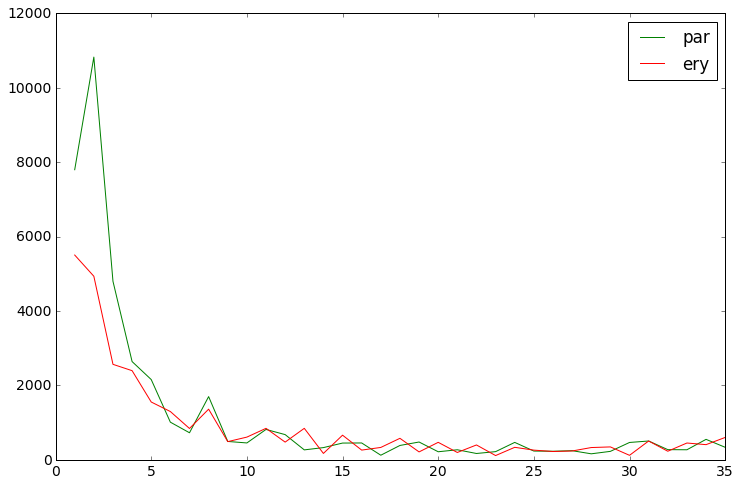

In [103]:
# plot 1D spectra for each population
pylab.plot(fs_par, 'g', label="par")
pylab.plot(fs_ery, 'r', label="ery")
pylab.legend()

These marginal unfolded spectra look similar in shape to the 1D folded spectra of each subspecies (see above).

In [104]:
fs_ery.pi() / pylab.sum(fs_ery.data)

In [105]:
fs_ery.data

array([ 27952.979034,   5504.293034,   4934.276604,   2566.124531,
         2396.011968,   1553.258202,   1297.416363,    841.89061 ,
         1361.150036,    488.491629,    610.185385,    845.894307,
          475.487934,    845.864915,    171.415147,    661.780934,
          260.92127 ,    332.462328,    577.679207,    212.03317 ,
          469.402014,    197.154764,    399.042864,    113.996089,
          335.465495,    260.04657 ,    223.011465,    236.792219,
          329.313785,    346.363423,    120.226742,    505.327788,
          230.191712,    451.244682,    407.265961,    600.901786,
         1458.220459])

In [106]:
n = 36 # 36 sequences sampled from 18 diploid individuals
pi_Wakeley = (sum( [i*(n-i)*fs_ery[i] for i in range(1, n)] ) * 2.0 / (n*(n-1)))
pi_Wakeley = pi_Wakeley / pylab.sum(fs_ery.data)
pi_Wakeley

$\delta$a$\delta$i's `pi` function seems to calculate the correct value of $\pi$ for this unfolded spectrum. However, it is worrying that $\pi$ from this marginal spectrum is about 20 times larger than the one calculated from the directly estimated 1D folded spectrum (see above the $\pi$ calculated from the folded 1D spectrum).  

In [107]:
fs_par.pi() / pylab.sum(fs_par.data)

In [108]:
pylab.sum(fs_par.data)

In [109]:
pylab.sum(EryPar_unfolded_2dsfs.data)

<font color="red">The sum over the marginalised 1D spectra should be the same as the sum over the 2D spectrum !</font>

In [110]:
# from dadi's marginalise function:
fs_ery.data

array([ 27952.979034,   5504.293034,   4934.276604,   2566.124531,
         2396.011968,   1553.258202,   1297.416363,    841.89061 ,
         1361.150036,    488.491629,    610.185385,    845.894307,
          475.487934,    845.864915,    171.415147,    661.780934,
          260.92127 ,    332.462328,    577.679207,    212.03317 ,
          469.402014,    197.154764,    399.042864,    113.996089,
          335.465495,    260.04657 ,    223.011465,    236.792219,
          329.313785,    346.363423,    120.226742,    505.327788,
          230.191712,    451.244682,    407.265961,    600.901786,
         1458.220459])

In [111]:
sfs2d = EryPar_unfolded_2dsfs.copy()

In [112]:
# this should get the marginal spectrum for ery
ery_mar = [pylab.sum(sfs2d.data[i]) for i in range(0, len(sfs2d))]
ery_mar

In [113]:
# this should get the marginal spectrum for ery and then take the sum over it
sum([pylab.sum(sfs2d.data[i]) for i in range(0, len(sfs2d))])

In [114]:
# look what happens if I include masking
sum([pylab.sum(sfs2d[i]) for i in range(0, len(sfs2d))])

In [115]:
fs_ery.data - ery_mar

array([ -1.06991366e+06,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
        -2.87751595e+02])

So, during the marginalisation the masking of data in the fixed categories (0, 36) is the problem, producing incorrectly marginalised counts in those masked categories. This is shown in the following:

In [116]:
sfs2d[0]

Spectrum([-- 6546.449601 9367.767974 3791.122626 1749.224237 1598.038967 656.869675
 412.970591 974.236078 142.404132 211.95951 521.906868 156.263585 5.346426
 159.363508 220.258071 175.985792 19.108475 57.580136 167.053354 34.227901
 87.965634 46.427042 86.934511 141.736163 52.391344 3.808952 47.21001
 11.204495 38.908948 74.130926 0.03966 46.362627 39.973018 59.216701
 1.520393 247.011103], folded=False, pop_ids=['ery', 'par'])

In [117]:
pylab.sum(sfs2d[0])

In [118]:
# from dadi's marginalise function:
fs_ery.data

array([ 27952.979034,   5504.293034,   4934.276604,   2566.124531,
         2396.011968,   1553.258202,   1297.416363,    841.89061 ,
         1361.150036,    488.491629,    610.185385,    845.894307,
          475.487934,    845.864915,    171.415147,    661.780934,
          260.92127 ,    332.462328,    577.679207,    212.03317 ,
          469.402014,    197.154764,    399.042864,    113.996089,
          335.465495,    260.04657 ,    223.011465,    236.792219,
          329.313785,    346.363423,    120.226742,    505.327788,
          230.191712,    451.244682,    407.265961,    600.901786,
         1458.220459])

In [119]:
# dividing by the correct number of sites to get pi per site:
fs_ery.pi() / pylab.sum(sfs2d.data)

This is very close to the estimate of $\pi$ derived from the folded 1D spectrum of ery! (see above)

In [120]:
fs_par.pi() / pylab.sum(sfs2d.data)

This is also nicely close to the estimate of $\pi_{site}$ of par from its folded 1D spectrum.

---

### Tajima's D

In [121]:
fs_ery.Watterson_theta() / pylab.sum(sfs2d.data)

In [122]:
fs_ery.Tajima_D()

In [123]:
fs_par.Tajima_D()

Now, I am calculating Tajima's D from the ery marginal spectrum by hand in order to check whether $\delta$a$\delta$i is doing the right thing.

In [124]:
n = 36
pi_Wakeley = (sum( [i*(n-i)*fs_ery.data[i] for i in range(1, n+1)] ) 
              * 2.0 / (n*(n-1)))
                #/ pylab.sum(sfs2d.data)
pi_Wakeley

In [125]:
# number of segregating sites
# this sums over all unmasked positions in the array
pylab.sum(fs_ery)

In [126]:
fs_ery.S()

In [127]:
S = pylab.sum(fs_ery)
theta_Watterson = S / pylab.sum(1.0 / (pylab.arange(1, n)))
theta_Watterson

In [128]:
# normalizing constant, see page 45 in Gillespie
a1 = pylab.sum(1.0 / pylab.arange(1, n))
#print a1
a2 = pylab.sum(1.0 / pylab.arange(1, n)**2.0)
#print a2
b1 = (n+1.0)/(3.0*(n-1))
#print b1
b2 = 2.0*(n**2 + n + 3)/(9.0*n*(n-1))
#print b2
c1 = b1 - (1.0/a1)
#print c1
c2 = b2 - (n+2.0)/(a1*n) + a2/a1**2
#print c2
C = ((c1/a1)*S + (c2/(a1**2.0 + a2))*S*(S-1))
C = C**(1/2.0)

In [129]:
ery_Tajimas_D = (pi_Wakeley - theta_Watterson) / C
print '{0:.6f}'.format(ery_Tajimas_D)

-0.054767


In [130]:
ery_Tajimas_D - fs_ery.Tajima_D()

$\delta$a$\delta$i seems to do the right thing. Note, that the estimate of Tajima's D from this marginal spectrum of ery is slightly different from the estimate derived from the folded 1D spectrum of ery (see /data3/claudius/Big_Data/ANGSD/SFS/SFS.Rmd). The folded 1D spectrum resulted in a Tajima's D estimate of $\sim$0.05, i. e. a difference of almost 0.1. Again, the 2D spectrum is based on only those sites for which there were at least 9 individiuals with data in *both* populations, whereas the 1D folded spectrum of ery included all sites for which there were 9 ery individuals with data (see line 1571 onwards in `assembly.sh`).

In [131]:
fs_par.Tajima_D()

My estimate from the folded 1D spectrum of par was -0.6142268 (see /data3/claudius/Big_Data/ANGSD/SFS/SFS.Rmd). 

### Multi-population statistics

In [134]:
EryPar_unfolded_2dsfs.S()

The 2D spectrum contains counts from 60k sites that are variable in *par* or *ery* or both.

In [136]:
EryPar_unfolded_2dsfs.Fst()

This estimate of $F_{ST}$ according to Weir and Cockerham (1984) is well below the estimate of $\sim$0.3 from ANGSD according to Bhatia/Hudson (2013). Note, however, that this estimate showed a positive bias of around 0.025 in 100 permutations of population labels of individuals. Taking the positive bias into account, both estimates of $F_{ST}$ are quite similar.

The following function `scramble_pop_ids` should generate a 2D SFS with counts as if individuals were assigned to populations randomly. Theoretically, the $F_{ST}$ calculated from this SFS should be 0.

In [145]:
%psource EryPar_unfolded_2dsfs.scramble_pop_ids

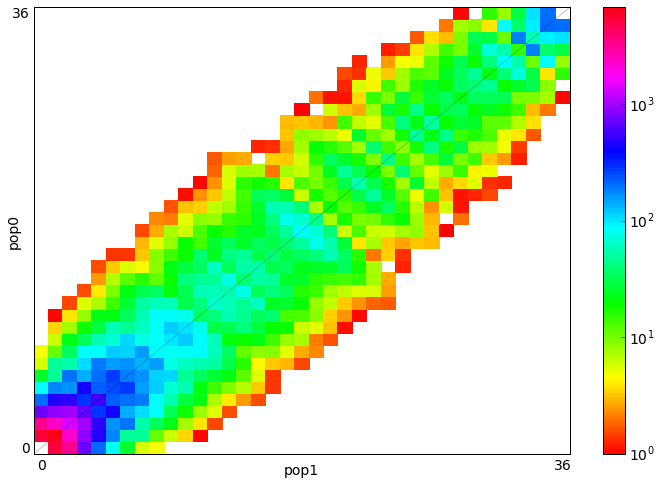

In [153]:
# plot the scrambled 2D SFS

dadi.Plotting.plot_single_2d_sfs(EryPar_unfolded_2dsfs.scramble_pop_ids(), vmin=1)

So, this is how the 2D SFS would look like if _ery_ and _par_ were not genetically differentiated.

In [154]:
# get Fst for scrambled SFS

EryPar_unfolded_2dsfs.scramble_pop_ids().Fst()

The $F_{ST}$ from the scrambled SFS is much lower than the $F_{ST}$ of the observed SFS. That should mean that there is significant population structure. However, the $F_{ST}$ from the scrambled SFS is not 0. I don't know why that is.

---

In [138]:
# folding

EryPar_folded_2dsfs = EryPar_unfolded_2dsfs.fold()

In [139]:
EryPar_folded_2dsfs

Spectrum([[-- 6651.315570000001 9534.20133 ..., 59.216701 19.075761999999997
  208.9562905]
 [4407.352191 453.932731 409.549382 ..., 3.9669600000000003
  4.851331999999999 --]
 [3746.5561820000003 295.73506799999996 261.799583 ..., 1e-06 -- --]
 ..., 
 [26.699661 1.593931 1e-06 ..., -- -- --]
 [78.253372 4.851332 -- ..., -- -- --]
 [208.9562905 -- -- ..., -- -- --]], folded=True, pop_ids=['ery', 'par'])

In [140]:
EryPar_folded_2dsfs.mask

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]], dtype=bool)

### Plotting

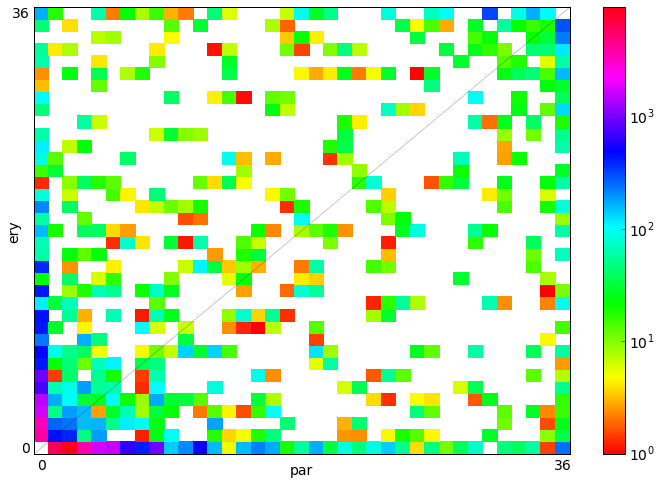

In [141]:
dadi.Plotting.plot_single_2d_sfs(EryPar_unfolded_2dsfs, vmin=1)

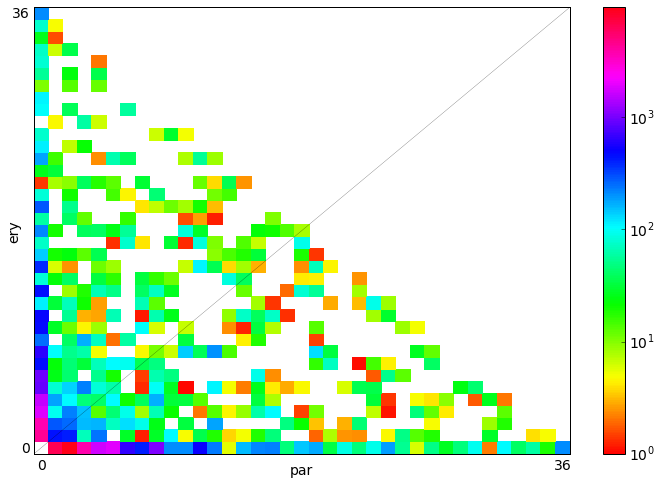

In [142]:
dadi.Plotting.plot_single_2d_sfs(EryPar_folded_2dsfs, vmin=1)

The folded 2D spectrum is *not* a minor allele frequency spectrum as are the 1D folded spectra of ery and par. This is because an allele that is minor in one population can be the major allele in the other. What is not counted are the alleles that are major in *both* populations, i. e. the upper right corner.

For the 2D spectrum to make sense it is crucial that allele frequencies are polarised the same way in both populations, either with an outgroup sequence or arbitrarily with respect to the reference sequence (as I did here).

#### How to fold a 1D spectrum

In [143]:
# unfolded spectrum from marginalisation of 2D unfolded spectrum
fs_ery

Spectrum([-- 5504.293033999999 4934.276604000001 2566.124531 2396.011968
 1553.2582019999998 1297.416363 841.8906099999998 1361.1500360000002
 488.49162899999993 610.185385 845.894307 475.48793400000005 845.864915
 171.41514700000002 661.7809339999999 260.92126999999994 332.462328
 577.679207 212.03316999999998 469.402014 197.154764 399.04286399999995
 113.996089 335.46549500000003 260.04657000000003 223.011465 236.792219
 329.313785 346.363423 120.226742 505.32778799999994 230.19171200000002
 451.244682 407.265961 600.9017859999999 --], folded=False, pop_ids=['ery'])

In [144]:
len(fs_ery)

In [145]:
fs_ery.fold()

Spectrum([-- 6105.194819999999 5341.542565000001 3017.369213 2626.2036799999996
 2058.5859899999996 1417.643105 1188.2540329999997 1690.4638210000003
 725.2838479999999 833.19685 1105.940877 810.9534290000001 959.861004
 570.4580109999999 858.9356979999999 730.323284 544.495498 577.679207 -- --
 -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

Let's use the formula (1.2) from Wakeley2009 to fold the 1D spectrum manually:
$$
\eta_{i} = \frac{\zeta_{i} + \zeta_{n-i}}{1 + \delta_{i, n-i}} \qquad 1 \le i \le [n/2]
$$
$n$ is the number of gene copies sampled, i. e. haploid sample size. $[n/2]$ is the largest integer less than or equal to n/2 (to handle uneven sample sizes). $\zeta_{i}$ are the unfolded frequencies and $\delta_{i, n-i}$ is Kronecker's $\delta$ which is 1 if $i = n-i$ and zero otherwise (to avoid counting the unfolded n/2 frequency class twice with even sample sizes).

In [146]:
fs_ery_folded = fs_ery.copy() # make a copy of the UNfolded spectrum
n = len(fs_ery)-1
for i in range(len(fs_ery)):
    fs_ery_folded[i] += fs_ery[n-i]
    if i == n/2.0:
        fs_ery_folded[i] /= 2
fs_ery_folded[0:19]

Spectrum([-- 6105.194819999999 5341.542565000001 3017.369213 2626.2036799999996
 2058.5859899999996 1417.643105 1188.2540329999997 1690.4638210000003
 725.2838479999999 833.19685 1105.940877 810.9534290000001 959.861004
 570.4580109999999 858.9356979999999 730.323284 544.495498 577.679207], folded=False, pop_ids=['ery'])

In [147]:
isinstance(fs_ery_folded, pylab.ndarray)

True

In [148]:
mask = [True] 
mask.extend([False] * 18)
mask.extend([True] * 18)
print mask
print sum(mask)

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
19


In [149]:
mask = [True] * 37
for i in range(len(mask)):
    if i > 0 and i < 19:
        mask[i] = False
print mask
print sum(mask)

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]
19


Here is how to flatten an array of arrays with list comprehension:

In [150]:
mask = [[True], [False] * 18, [True] * 18]
print mask

[[True], [False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False], [True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]]


In [151]:
print [elem for a in mask for elem in a]

[True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True, True]


Set new mask for the folded spectrum:

In [152]:
fs_ery_folded.mask = mask

In [153]:
fs_ery_folded.folded = True

In [154]:
fs_ery_folded - fs_ery.fold()

Spectrum([-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --
 -- -- -- -- -- -- -- -- -- -- -- --], folded=True, pop_ids=['ery'])

The `fold()` function works correctly for 1D spectra, at least. How about 2D spectra?

$$
\eta_{i,j} = \frac{\zeta_{i,j} + \zeta_{n-i, m-j}}{1 + \delta_{i, n-i; j, m-j}} 
            \qquad 1 \le i+j \le \Big[\frac{n+m}{2}\Big]
$$

In [155]:
EryPar_unfolded_2dsfs.sample_sizes

array([36, 36])

In [156]:
EryPar_unfolded_2dsfs._total_per_entry()

array([[ 0,  1,  2, ..., 34, 35, 36],
       [ 1,  2,  3, ..., 35, 36, 37],
       [ 2,  3,  4, ..., 36, 37, 38],
       ..., 
       [34, 35, 36, ..., 68, 69, 70],
       [35, 36, 37, ..., 69, 70, 71],
       [36, 37, 38, ..., 70, 71, 72]])

In [157]:
# copy the unfolded 2D spectrum for folding
import copy
sfs2d_folded = copy.deepcopy(EryPar_unfolded_2dsfs)

In [158]:
n = len(sfs2d_folded)-1
m = len(sfs2d_folded[0])-1
for i in range(n+1):
    for j in range(m+1):
        sfs2d_folded[i,j] += sfs2d_folded[n-i, m-j]
        if i == n/2.0 and j == m/2.0:
            sfs2d_folded[i,j] /= 2

In [159]:
mask = sfs2d_folded._total_per_entry() > (n+m)/2
mask

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [160]:
sfs2d_folded.mask = mask
sfs2d_folded.fold = True

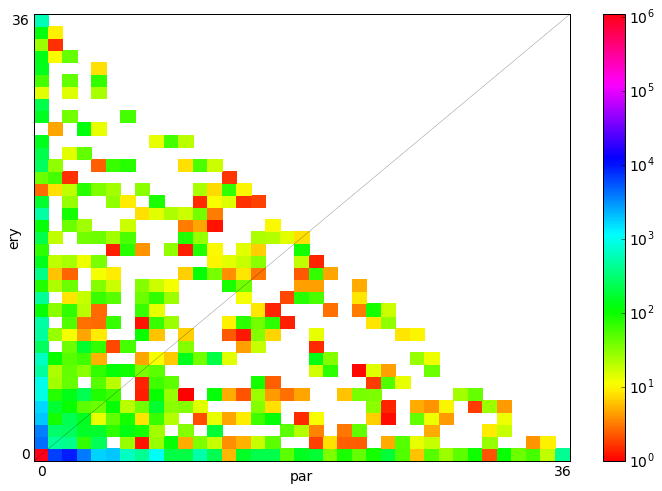

In [161]:
dadi.Plotting.plot_single_2d_sfs(sfs2d_folded, vmin=1)

I am going to go through every step in the `fold` function of dadi:

In [162]:
# copy the unfolded 2D spectrum for folding
import copy
sfs2d_unfolded = copy.deepcopy(EryPar_unfolded_2dsfs)

In [163]:
total_samples = pylab.sum(sfs2d_unfolded.sample_sizes)
total_samples

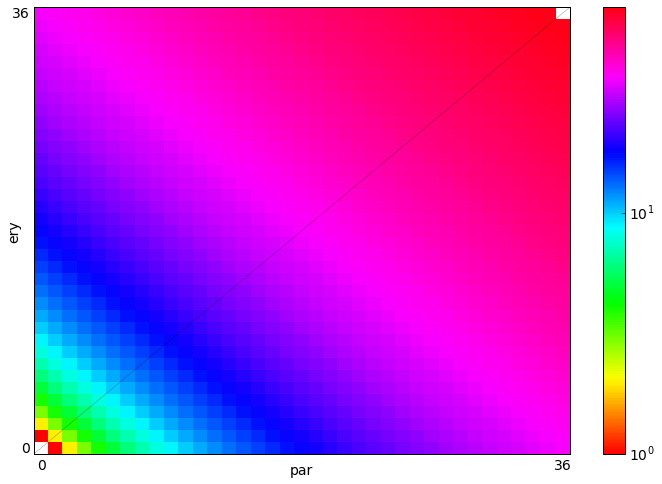

In [164]:
total_per_entry = dadi.Spectrum(sfs2d_unfolded._total_per_entry(), pop_ids=['ery', 'par'])
#total_per_entry.pop_ids = ['ery', 'par']
dadi.Plotting.plot_single_2d_sfs(total_per_entry, vmin=1)

In [165]:
total_per_entry = sfs2d_unfolded._total_per_entry()
total_per_entry

array([[ 0,  1,  2, ..., 34, 35, 36],
       [ 1,  2,  3, ..., 35, 36, 37],
       [ 2,  3,  4, ..., 36, 37, 38],
       ..., 
       [34, 35, 36, ..., 68, 69, 70],
       [35, 36, 37, ..., 69, 70, 71],
       [36, 37, 38, ..., 70, 71, 72]])

In [166]:
where_folded_out = total_per_entry > total_samples/2
where_folded_out

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [167]:
original_mask = sfs2d_unfolded.mask
original_mask

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]], dtype=bool)

In [168]:
pylab.logical_or([True, False, True], [False, False, True])

array([ True, False,  True], dtype=bool)

In [169]:
# get the number of elements along each axis
sfs2d_unfolded.shape

In [170]:
[slice(None, None, -1) for i in sfs2d_unfolded.shape]

[slice(None, None, -1), slice(None, None, -1)]

In [171]:
matrix = pylab.array([
    [1, 2, 3, 4],
    [5, 6, 7, 8],
    [9, 10, 11, 12]
])
reverse_slice = [slice(None, None, -1) for i in matrix.shape]
reverse_slice

[slice(None, None, -1), slice(None, None, -1)]

In [172]:
matrix[reverse_slice]

array([[12, 11, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

In [173]:
matrix[::-1,::-1]

array([[12, 11, 10,  9],
       [ 8,  7,  6,  5],
       [ 4,  3,  2,  1]])

With the variable length list of slice objects, one can generalise the reverse of arrays with any dimensions.

In [174]:
final_mask = pylab.logical_or(original_mask, dadi.Numerics.reverse_array(original_mask))
final_mask

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True]], dtype=bool)

Here, folding doesn't mask new cells.

In [175]:
?pylab.where

In [176]:
pylab.where(matrix < 6, matrix, 0)

array([[1, 2, 3, 4],
       [5, 0, 0, 0],
       [0, 0, 0, 0]])

In [177]:
# this takes the part of the spectrum that is non-sensical if the derived allele is not known
# and sets the rest to 0
print pylab.where(where_folded_out, sfs2d_unfolded, 0)

[[   0.          0.          0.       ...,    0.          0.          0.      ]
 [   0.          0.          0.       ...,    0.          0.         33.96861 ]
 [   0.          0.          0.       ...,    0.          1.593931
    26.499772]
 ..., 
 [   0.          0.          0.       ...,   21.754621   30.856007
   232.64872 ]
 [   0.          0.          3.966959 ...,   16.189377   19.283053
   298.187262]
 [   0.         17.555369    0.       ...,  166.433356  104.865969
   287.751595]]


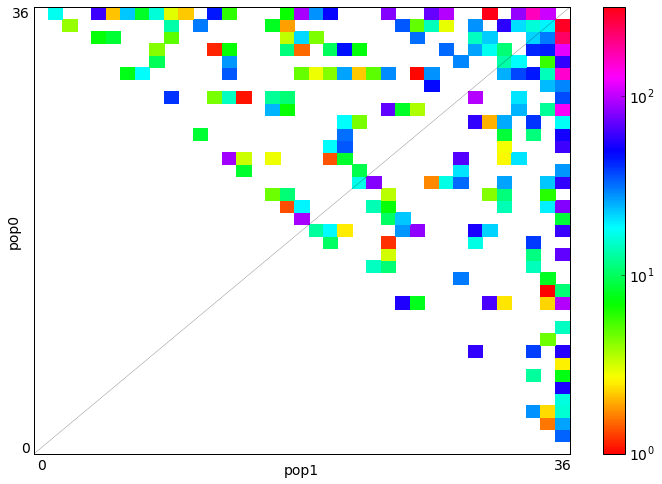

In [178]:
# let's plot the bit of the spectrum that we are going to fold onto the rest:
dadi.Plotting.plot_single_2d_sfs(dadi.Spectrum(pylab.where(where_folded_out, sfs2d_unfolded, 0)), vmin=1)

In [179]:
# now let's reverse this 2D array, i. e. last row first and last element of each row first:
_reversed = dadi.Numerics.reverse_array(pylab.where(where_folded_out, sfs2d_unfolded, 0))
_reversed

array([[ 287.751595,  104.865969,  166.433356, ...,    0.      ,
          17.555369,    0.      ],
       [ 298.187262,   19.283053,   16.189377, ...,    3.966959,
           0.      ,    0.      ],
       [ 232.64872 ,   30.856007,   21.754621, ...,    0.      ,
           0.      ,    0.      ],
       ..., 
       [  26.499772,    1.593931,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [  33.96861 ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ],
       [   0.      ,    0.      ,    0.      , ...,    0.      ,
           0.      ,    0.      ]])

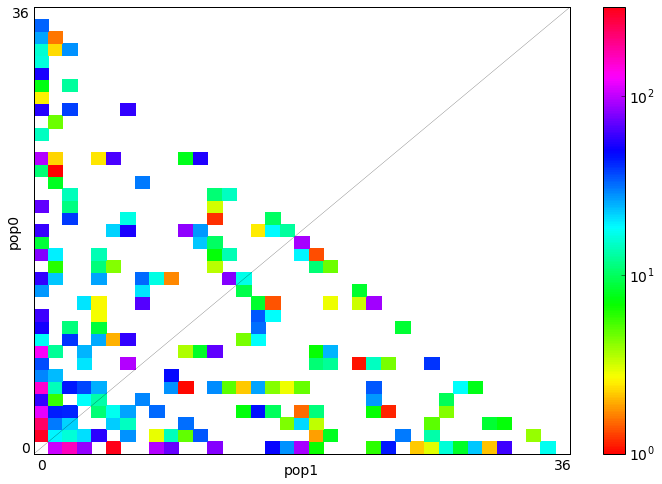

In [180]:
dadi.Plotting.plot_single_2d_sfs(dadi.Spectrum(_reversed), vmin=1)

The transformation we have done with the upper-right diagonal 2D array above should be identical to projecting it across a vertical center line (creating an upper left triangular matrix) and then projecting it across a horizontal center line (creating the final lower left triangular matrix). Note, that this is not like mirroring the upper-right triangular 2D array across the 36-36 diagonal!

In [181]:
# This shall now be added to the original unfolded 2D spectrum.
sfs2d_folded = pylab.ma.masked_array(sfs2d_unfolded.data + _reversed) 

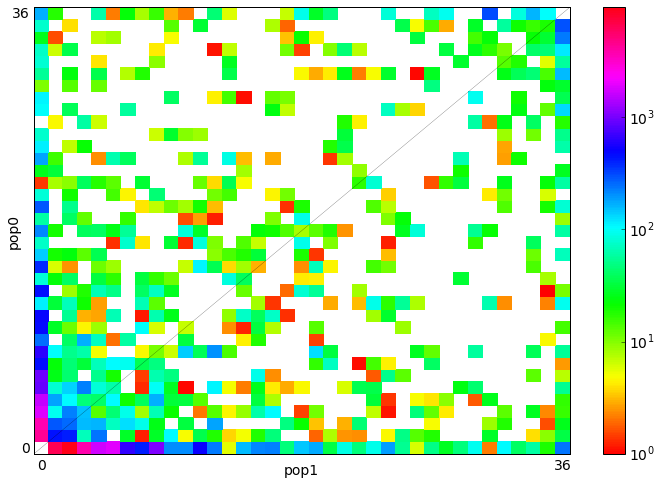

In [182]:
dadi.Plotting.plot_single_2d_sfs(dadi.Spectrum(sfs2d_folded), vmin=1)

In [183]:
sfs2d_folded.data

array([[  1.07020142e+06,   6.65131557e+03,   9.53420133e+03, ...,
          5.92167010e+01,   1.90757620e+01,   2.47011103e+02],
       [  4.40735219e+03,   4.53932731e+02,   4.09549382e+02, ...,
          3.96696000e+00,   9.70266300e+00,   3.39686100e+01],
       [  3.74655618e+03,   2.95735068e+02,   2.61799583e+02, ...,
          2.00000000e-06,   1.59393100e+00,   2.64997720e+01],
       ..., 
       [  2.66996610e+01,   1.59393100e+00,   0.00000000e+00, ...,
          2.17546210e+01,   3.08560070e+01,   2.32648720e+02],
       [  7.82533720e+01,   1.00000000e-06,   3.96695900e+00, ...,
          1.61893770e+01,   1.92830530e+01,   2.98187262e+02],
       [  1.70901478e+02,   1.75553690e+01,   0.00000000e+00, ...,
          1.66433356e+02,   1.04865969e+02,   2.87751595e+02]])

In [184]:
sfs2d_folded.data[where_folded_out] = 0
sfs2d_folded.data

array([[  1.07020142e+06,   6.65131557e+03,   9.53420133e+03, ...,
          5.92167010e+01,   1.90757620e+01,   2.47011103e+02],
       [  4.40735219e+03,   4.53932731e+02,   4.09549382e+02, ...,
          3.96696000e+00,   9.70266300e+00,   0.00000000e+00],
       [  3.74655618e+03,   2.95735068e+02,   2.61799583e+02, ...,
          2.00000000e-06,   0.00000000e+00,   0.00000000e+00],
       ..., 
       [  2.66996610e+01,   1.59393100e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  7.82533720e+01,   1.00000000e-06,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00],
       [  1.70901478e+02,   0.00000000e+00,   0.00000000e+00, ...,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]])

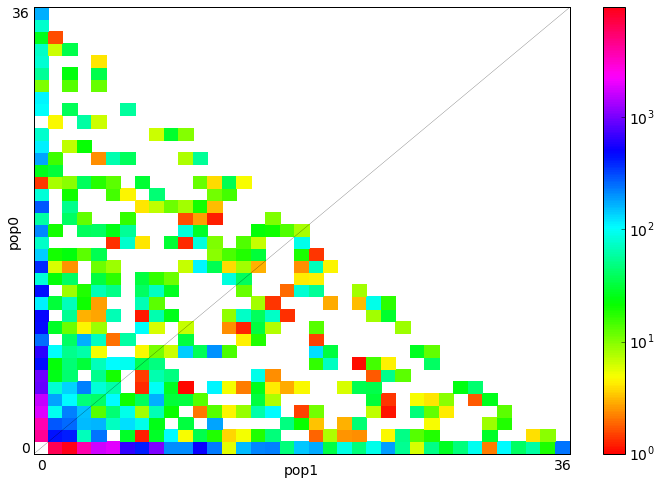

In [185]:
dadi.Plotting.plot_single_2d_sfs(dadi.Spectrum(sfs2d_folded), vmin=1)

In [186]:
sfs2d_folded.shape

In [187]:
where_ambiguous = (total_per_entry == total_samples/2.0)
where_ambiguous

array([[False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True, False],
       [False, False, False, ...,  True, False, False],
       ..., 
       [False, False,  True, ..., False, False, False],
       [False,  True, False, ..., False, False, False],
       [ True, False, False, ..., False, False, False]], dtype=bool)

SNP's with joint frequencies in the True cells are counted twice at the moment due to the folding and the fact that the sample sizes are even.

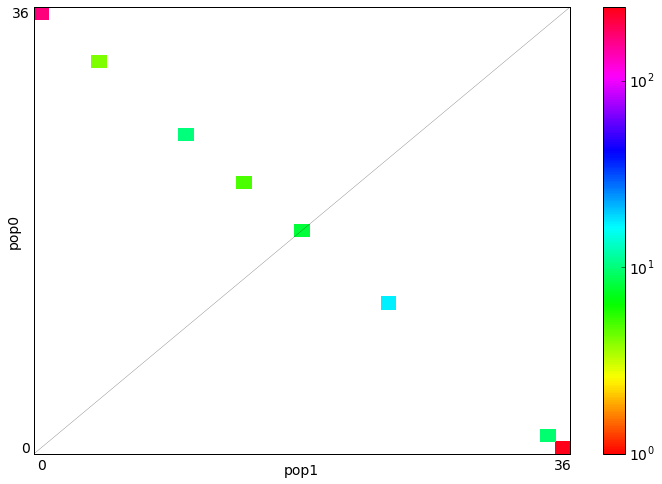

In [188]:
# this extracts the diagonal values from the UNfolded spectrum and sets the rest to 0
ambiguous = pylab.where(where_ambiguous, sfs2d_unfolded, 0)
dadi.Plotting.plot_single_2d_sfs(dadi.Spectrum(ambiguous), vmin=1)

These are the values in the diagonal before folding.

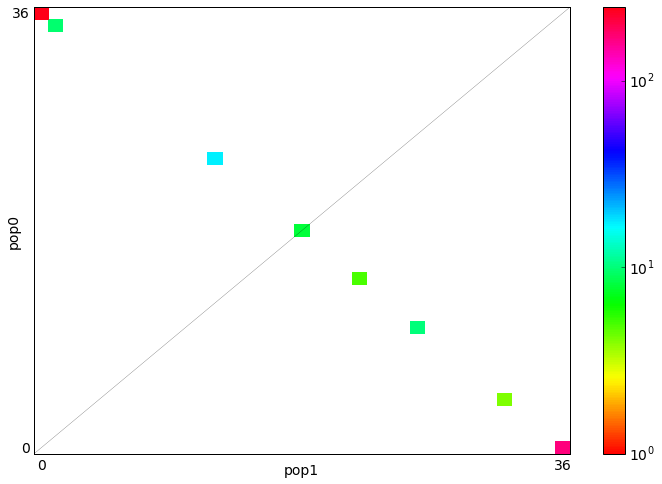

In [189]:
reversed_ambiguous = dadi.Numerics.reverse_array(ambiguous)
dadi.Plotting.plot_single_2d_sfs(dadi.Spectrum(reversed_ambiguous), vmin=1)

These are the values that got added to the diagonal during folding. Comparing with the previous plot, one can see for instance that the value in the (0, 36) class got added to the value in the (36, 0) class and vice versa. The two frequency classes are equivalent, since it is arbitrary which allele we call minor in the total sample (of 72 gene copies). These SNP's are therefore counted twice.

In [190]:
a = -1.0*ambiguous + 0.5*ambiguous + 0.5*reversed_ambiguous
b = -0.5*ambiguous + 0.5*reversed_ambiguous
a == b

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [191]:
sfs2d_folded += -0.5*ambiguous + 0.5*reversed_ambiguous

In [192]:
final_mask = pylab.logical_or(final_mask, where_folded_out)
final_mask

array([[ True, False, False, ..., False, False, False],
       [False, False, False, ..., False, False,  True],
       [False, False, False, ..., False,  True,  True],
       ..., 
       [False, False, False, ...,  True,  True,  True],
       [False, False,  True, ...,  True,  True,  True],
       [False,  True,  True, ...,  True,  True,  True]], dtype=bool)

In [193]:
sfs2d_folded = dadi.Spectrum(sfs2d_folded, mask=final_mask, data_folded=True, pop_ids=['ery', 'par'])

In [194]:
pylab.rcParams['figure.figsize'] = [12.0, 8.0]

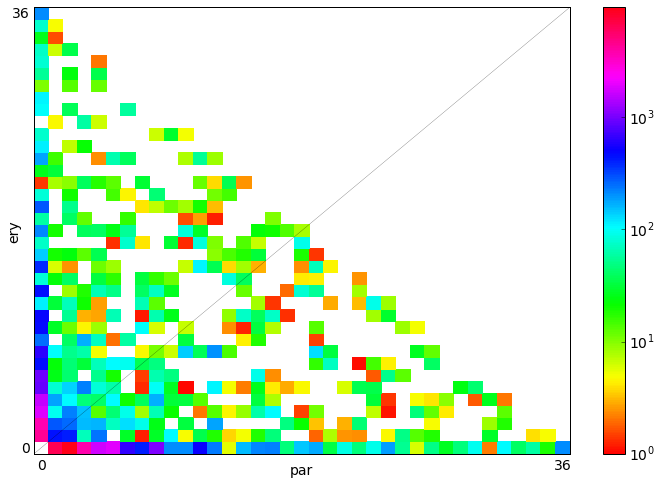

In [195]:
dadi.Plotting.plot_single_2d_sfs(sfs2d_folded, vmin=1)

---

### Model specification